## Experiment Neural Network to Approximate XOR

### Summary
In this notebook, we will compare varous architects fo neural networks with respects to abilities of approximating XOR. 

In [1]:
import os
import logging

import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import keras

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
from utils import gen_xor_data
from utils import classifier_evaluation
from utils import plot_roc

### Load Data
In this section, we will create synthetic dataset which is generated with XOR

In [3]:
sample_data = gen_xor_data(size=1000, random_seed=42)
xx = sample_data[['x1', 'x2']].as_matrix()
yy = sample_data['y'].as_matrix()

visualize **XOR** synthetic dataset

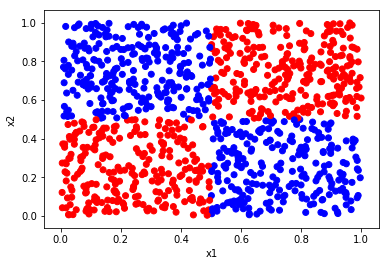

In [35]:
color_list = ['blue', 'red']
colors = [color_list[ii] for ii in yy.tolist()]

plt.scatter(x=sample_data['x1'].tolist(), 
            y=sample_data['x2'].tolist(), 
            c=colors)
plt.xlabel('x1')
plt.ylabel('x2') 

split data into train (or validation) and test

In [4]:
from sklearn.model_selection import train_test_split

train_xx, test_xx, train_yy, test_yy = train_test_split(xx, yy, test_size=0.3)

### Attempt01: Build a nerual network (1-hidden layer with 4 neuron)
In this section, we will try to train a neural network as following configuration:
* #hidden layers: 1
* #nerons: 4 
* activation function: 'relu'
* output layer, activation function: 'sigmoid'

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [20]:
model.fit(train_xx, train_yy, epochs=1000, batch_size=50, verbose=0)

validating the trained model

In [21]:
train_y_pred = model.predict(train_xx).flatten()
test_y_pred = model.predict(test_xx).flatten()

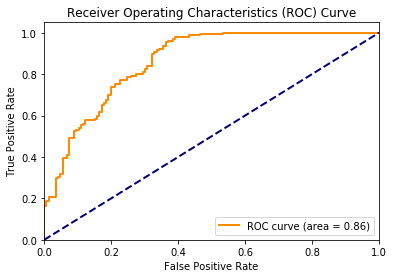

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(test_yy, test_y_pred)
_ = plot_roc(fpr, tpr)

**Results**: Given the architect, the best performance we could attain with test dataset is 0.86 ROC area.

### Attempt 02: two-hidden layers
* #hidden layers: 2 (4 - 'relu', 2 - 'relu')
* output layer, activation function: 'sigmoid'

In [39]:
model02 = Sequential()
model02.add(Dense(6, activation='relu', input_shape=(2,)))
model02.add(Dense(4, activation='relu', input_shape=(4,)))
model02.add(Dense(1, activation='sigmoid'))

model02.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [43]:
model02.fit(train_xx, train_yy, epochs=500, batch_size=20, verbose=0)

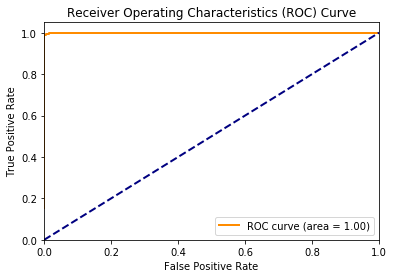

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

test_y_pred = model02.predict(test_xx).flatten()
fpr, tpr, thresholds = roc_curve(test_yy, test_y_pred)
_ = plot_roc(fpr, tpr)

**Results**: With a deeper neural network, we could get a perfect model to represent XOR logic perfecttly.